In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].median())

In [5]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
stroke.shape

(5110, 12)

# Label Encoding

In [7]:
stroke1=stroke.copy()

In [8]:
# Select the object columns

In [9]:
obj=stroke1.select_dtypes(include='O')
obj.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [10]:
stroke1['gender']=le.fit_transform(stroke1['gender'])

In [11]:
stroke.gender.value_counts(),stroke1.gender.value_counts()

(Female    2994
 Male      2115
 Other        1
 Name: gender, dtype: int64,
 0    2994
 1    2115
 2       1
 Name: gender, dtype: int64)

In [12]:
obje=['ever_married','work_type','Residence_type','smoking_status']

In [13]:
for ob in obje:
    stroke1[ob]=le.fit_transform(stroke[ob])
stroke1.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [14]:
stroke1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# One hot encoding

In [15]:
stroke2=stroke.copy()

In [16]:
objj=stroke2.select_dtypes(include='O')
objj.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [17]:
ob=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

In [18]:
# put the column names in the columns, conducting one hot encoding

In [56]:
stroke2=pd.get_dummies(stroke,columns=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status'])
stroke2

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [20]:
stroke.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [21]:
stroke2.shape

(5110, 23)

In [22]:
stroke.shape,stroke1.shape,stroke2.shape

((5110, 12), (5110, 12), (5110, 23))

In [23]:
stroke2=pd.get_dummies(stroke,columns=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status'],prefix='',prefix_sep='')
stroke2

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


# Feature Scaling

In [24]:
house=pd.read_csv('house_price.csv')
house.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.53480,179700.0,NEAR BAY
1,1,-122.22,37.86,21.0,2127.0,435.0,2401.0,409.0,3.53475,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,NEAR BAY


In [25]:
house.nunique()

Unnamed: 0            20640
longitude               844
latitude                862
housing_median_age       52
total_rooms            4099
total_bedrooms          801
population             2626
households              801
median_income         12185
median_house_value     3410
ocean_proximity           5
dtype: int64

In [26]:
house.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2068.780426,409.356008,1171.845252,392.967926,3.617016,181825.673256
std,5958.399114,2.003532,2.135952,12.585558,906.612417,163.477362,550.882795,165.344451,1.412814,81066.935895
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,2596.000000,497.000000,1488.000000,487.000000,4.500000,229700.000000
max,20639.000000,-114.310000,41.950000,52.000000,4572.000000,802.000000,3069.000000,811.000000,7.955600,425100.000000


In [27]:
house.isna().sum()

Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [28]:
house=house.drop(['Unnamed: 0'],1)
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.53480,179700.0,NEAR BAY
1,-122.22,37.86,21.0,2127.0,435.0,2401.0,409.0,3.53475,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.56030,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.55680,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.70000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.86720,84700.0,INLAND


In [29]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2068.780426,409.356008,1171.845252,392.967926,3.617016,181825.673256
std,2.003532,2.135952,12.585558,906.612417,163.477362,550.882795,165.344451,1.412814,81066.935895
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,2596.000000,497.000000,1488.000000,487.000000,4.500000,229700.000000
max,-114.310000,41.950000,52.000000,4572.000000,802.000000,3069.000000,811.000000,7.955600,425100.000000


In [30]:
# select the continuous variables

In [31]:
cont=house.select_dtypes(exclude='O')
cont.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [32]:
# In this instance the target variable is the median_house_value and we do not scale the target variable

In [33]:
# use a 2d because it returns in matrix

In [34]:
con=([['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',]])

In [35]:
#Make three copies of the original as there are three types on scaling

In [36]:
hm=house.copy()   #For MinMax Scaling

In [37]:
hr=house.copy()   #For Robust Scaling

In [38]:
hs=house.copy()   #For Standard Scaling

# MIN MAX SCALER

In [39]:
mx=MinMaxScaler()

In [40]:
for c in con:
    hm[c]=mx.fit_transform(hm[c])
hm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.192123,0.159800,0.104044,0.154321,0.407058,179700.0,NEAR BAY
1,0.212151,0.565356,0.392157,0.464989,0.541823,0.782127,0.503704,0.407051,358500.0,NEAR BAY
2,0.210159,0.564293,1.000000,0.320569,0.235955,0.160796,0.217284,0.906354,352100.0,NEAR BAY
3,0.209163,0.564293,1.000000,0.278337,0.292135,0.181018,0.269136,0.689835,341300.0,NEAR BAY
4,0.209163,0.564293,1.000000,0.355580,0.348315,0.183301,0.318519,0.448824,342200.0,NEAR BAY


In [41]:
hm.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.452250,0.509808,0.381228,0.483911,0.418085,181825.673256
std,0.199555,0.226988,0.246776,0.198383,0.204092,0.179675,0.204129,0.189495,81066.935895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,0.253984,0.147715,0.333333,0.316357,0.369538,0.255708,0.344444,0.276768,119600.000000
50%,0.583665,0.182784,0.549020,0.464989,0.541823,0.379322,0.503704,0.407044,179700.000000
75%,0.631474,0.549416,0.705882,0.567615,0.619226,0.484344,0.600000,0.536516,229700.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,425100.000000


In [42]:
# Due to the scaling, the standard deviation is now lower and the colums are in a scal of 0-1

In [43]:
con

[['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income']]

# STANDARD SCALER

In [44]:
st=StandardScaler()

In [45]:
for c in con:
    hs[c]=st.fit_transform(hs[c])
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-1.311265,-1.714995,-1.542734,-1.614656,-0.058194,179700.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.064218,0.156870,2.231300,0.096964,-0.058230,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.663784,-1.341845,-1.226870,-1.306201,2.576752,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.876670,-1.066571,-1.114321,-1.052180,1.434112,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.487299,-0.791297,-1.101614,-0.810255,0.162222,342200.0,NEAR BAY


In [46]:
hs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,-6.527810e-15,1.256263e-15,8.557001e-16,2.884810e-15,1.172587e-15,1.632092e-16,8.954454e-16,6.342364e-17,181825.673256
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,81066.935895
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-2.279729e+00,-2.497997e+00,-2.121819e+00,-2.370672e+00,-2.206370e+00,14999.000000
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-6.850176e-01,-6.873045e-01,-6.986143e-01,-6.832444e-01,-7.457750e-01,119600.000000
50%,5.389137e-01,-6.422871e-01,2.864572e-02,6.421816e-02,1.568695e-01,-1.061096e-02,9.696402e-02,-5.826522e-02,179700.000000
75%,7.784964e-01,9.729566e-01,6.643103e-01,5.815411e-01,5.361361e-01,5.739196e-01,5.687179e-01,6.249976e-01,229700.000000
max,2.625280e+00,2.958068e+00,1.856182e+00,2.761136e+00,2.401883e+00,3.443928e+00,2.528311e+00,3.070955e+00,425100.000000


# ROBUST SCALER

In [50]:
rs=RobustScaler()

In [51]:
for c in con:
    hr[c]=rs.fit_transform(hr[c])
hr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.986807,0.957672,0.631579,-1.086000,-1.530,-1.203994,-1.367150,0.000052,179700.0,NEAR BAY
1,-0.984169,0.952381,-0.421053,0.000000,0.000,1.761769,0.000000,0.000026,358500.0,NEAR BAY
2,-0.989446,0.949735,1.210526,-0.574788,-1.225,-0.955777,-1.120773,1.922286,352100.0,NEAR BAY
3,-0.992084,0.949735,1.210526,-0.742870,-1.000,-0.867332,-0.917874,1.088712,341300.0,NEAR BAY
4,-0.992084,0.949735,1.210526,-0.435445,-0.775,-0.857347,-0.724638,0.160849,342200.0,NEAR BAY


In [52]:
hr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-0.284882,0.362926,-0.018974,-0.050703,-0.128220,0.008338,-0.077450,0.042505,181825.673256
std,0.528636,0.565067,0.662398,0.789560,0.817387,0.785853,0.798765,0.729533,81066.935895
min,-1.546174,-0.455026,-1.473684,-1.850642,-2.170000,-1.659058,-1.971014,-1.567076,14999.000000
25%,-0.873351,-0.087302,-0.578947,-0.591552,-0.690000,-0.540656,-0.623188,-0.501549,119600.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,0.126649,0.912698,0.421053,0.408448,0.310000,0.459344,0.376812,0.498451,229700.000000
max,1.102902,2.034392,1.210526,2.129327,1.835000,2.714693,1.942029,2.282815,425100.000000


In [53]:
# the fifty percent ndio median therefore anything below 25% and above 75% was scaled

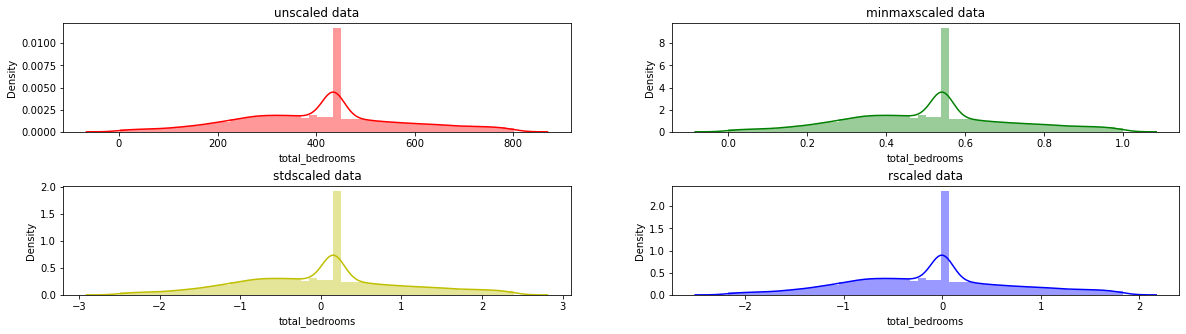

In [54]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,2, figsize=(20,5))
sb.distplot(house['total_bedrooms'],ax=ax[0,0],color='r')
ax[0,0].set_title('unscaled data')
sb.distplot(hm['total_bedrooms'],ax=ax[0,1],color='g')
ax[0,1].set_title('minmaxscaled data')
sb.distplot(hs['total_bedrooms'],ax=ax[1,0],color='y')
ax[1,0].set_title('stdscaled data')
sb.distplot(hr['total_bedrooms'],ax=ax[1,1],color='b')
ax[1,1].set_title('rscaled data')
plt.subplots_adjust(hspace=0.5)

In [55]:
# Subplot is a graph that allows other little graphs to exist within
#ax is the axis
#(2,2) means that we are plotting two rows and two columns
#hspace is the distance of the graphs horizontally